Manually calculated F = 101.3823
P-value = 1.1102230246251565e-16
Scipy ANOVA result: F_onewayResult(statistic=101.38229101480039, pvalue=2.4872587514569636e-43)


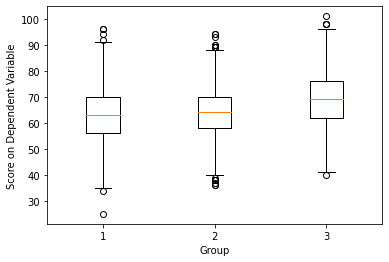

Eta-Squared = 0.06336859379229393


In [1]:
# one factor independent samples ANOVA

import numpy as np
import statistics
import random
import scipy
from scipy import stats
import matplotlib.pyplot as plt

# generating three samples with different means

sample1 = []
sample2 = []
sample3 = []

random_means = np.random.choice(np.arange(50, 80), size = 3)

for i in range(0,1000):
    sample1.append(round(10*np.random.randn()+random_means[0]))
    sample2.append(round(10*np.random.randn()+random_means[1]))
    sample3.append(round(10*np.random.randn()+random_means[2]))


# defining the total number of scores, number of levels of the factor and degrees of freedom

N = len(sample1)+len(sample2)+len(sample3)
k = 3
df_total = N-1
df_between_treatments = k-1
df_within_treatments = (len(sample1)-1) + (len(sample2)-1) + (len(sample3)-1)

# calculating the total sum of squares 

x_sqd = []

for i in sample1:
    x_sqd.append(i**2)
  
for i in sample2:
    x_sqd.append(i**2)
    
for i in sample3:
    x_sqd.append(i**2)

    
sum_x_sqd = sum(x_sqd)

g_sq = (sum(sample1)+sum(sample2)+sum(sample3))**2

ss_total = sum_x_sqd - (g_sq/N)

# calculating the between treatments sum of squares

total_sample1 = sum(sample1)
total_sample2 = sum(sample2)
total_sample3 = sum(sample3)

SS_between_treatments = (((total_sample1**2/len(sample1)) + (total_sample2**2/len(sample2)) + (total_sample3**2/len(sample3))) - g_sq/N)

# calculating the within treatments sum of squares

sqs_sample1 = []


for i in np.arange(len(sample1)):
    sqs_sample1.append(sample1[i]**2)
    

SS_sample1 = sum(sqs_sample1) - sum(sample1)**2/len(sample1)

sqs_sample2 = []


for i in np.arange(len(sample2)):
    sqs_sample2.append(sample2[i]**2)
    

SS_sample2 = sum(sqs_sample2) - sum(sample2)**2/len(sample2)

sqs_sample3 = []


for i in np.arange(len(sample3)):
    sqs_sample3.append(sample3[i]**2)

SS_sample3 = sum(sqs_sample3) - sum(sample3)**2/len(sample3)

SS_within_treatments = SS_sample1 + SS_sample2 + SS_sample3

# calculating the between treatments and within treatments variance

between_treatments_variance = SS_between_treatments/df_between_treatments

within_treatments_variance = SS_within_treatments/df_within_treatments

# calculating the F ratio

F_ratio = between_treatments_variance/within_treatments_variance

print('Manually calculated F =', round(F_ratio, 4))
print('P-value =', 1 - scipy.stats.f.cdf(F_ratio, dfn = df_between_treatments, dfd = df_within_treatments))

# checking result with scipy ANOVA

scipy_result = scipy.stats.f_oneway(sample1,sample2,sample3)

print('Scipy ANOVA result:', scipy_result)
    
# plotting a boxplot of the data

plt.boxplot([sample1,sample2,sample3])
plt.xlabel('Group')
plt.ylabel('Score on Dependent Variable')
plt.show()

# calculating effect size

eta_squared = SS_between_treatments/(SS_between_treatments+SS_within_treatments)

print('Eta-Squared =', eta_squared)